In [1]:
import csv
data = []
with open('unimodal_image_dev.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            data.append(row)
        line_count += 1


In [2]:
import jsonlines
import numpy as np
samples=[]
count = 0
with jsonlines.open('dev.jsonl') as file:
    for line in file.iter():
        line['predict'] = data[count][2]
        line['confidence'] = np.abs(float(data[count][1])-0.5)
        samples.append(line)
        count += 1
 

In [3]:
data[1]

['46971', '0.28373610973358154', '0']

In [4]:
samples[1]

{'id': 46971,
 'img': 'img/46971.png',
 'label': 1,
 'text': 'bravery at its finest',
 'predict': '0',
 'confidence': 0.21626389026641846}

In [5]:
wrong_samples = []
for sample in samples:
    if int(sample['predict']) != sample['label']:
        wrong_samples.append(sample)

In [6]:
print("total samples:",len(samples))
print("wrong samples:",len(wrong_samples))

total samples: 500
wrong samples: 233


In [25]:
wrong_samples.sort(key=lambda x: float(x['confidence']))


In [26]:
count =204
import matplotlib.image as mpimg 
import matplotlib.pyplot as plt

{'id': 32049, 'img': 'img/32049.png', 'label': 0, 'text': "german british danish austrian diversity. apparently we don't have it and these guys do: iraqi, pakistani, syrian, egyptian", 'predict': '1', 'confidence': 0.21184182167053223}


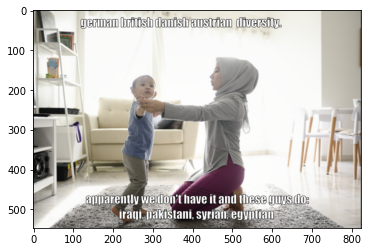

In [44]:
wrong = wrong_samples[count]
count-=1
filename = "img/"+str(wrong['id'])+'.png'
img = mpimg.imread(filename)
plt.imshow(img)
print(wrong)

In [18]:
predict1 = 0
for wrong in wrong_samples:
    if wrong['predict'] == '1':
        predict1 += 1
print(predict1)

82


In [7]:
false_pos = []
false_neg = []
for w in wrong_samples:
    if w['predict'] == '1':
        false_pos.append(float(w['confidence']))
    else:
        false_neg.append(float(w['confidence']))

In [8]:
import jsonlines
samples=[]
count = 0
with jsonlines.open('train.jsonl') as file:
    for line in file.iter():
        samples.append(line)
        count += 1
 

In [9]:
total1 = 0
for s in samples:
    if s['label'] == 1:
        total1+=1
print(total1)

3050


In [11]:
import numpy as np
print("% of hate speech in train",3050/8500)
print("% of hate speech in dev",250/500)
print("% of error is false positive",81/205)
print("avg confidence of false positives",np.mean(np.array(false_pos)))
print("avg confidence of false negative",np.mean(np.array(false_neg)))

% of hate speech in train 0.3588235294117647
% of hate speech in dev 0.5
% of error is false positive 0.3951219512195122
avg confidence of false positives 0.07294195890426636
avg confidence of false negative 0.1381998488573524


In [10]:
import csv
data1 = []
with open('unimodal_image_dev.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            data1.append(row)
        line_count += 1

data2 = []
with open('unimodel_text_dev.csv') as csv_file:
    csv_reader = csv.reader(csv_file, delimiter=',')
    line_count = 0
    for row in csv_reader:
        if line_count != 0:
            data2.append(row)
        line_count += 1


In [11]:
import jsonlines
import numpy as np
samples=[]
count = 0
with jsonlines.open('dev.jsonl') as file:
    for line in file.iter():
        line['predict1'] = data1[count][2]
        line['confidence1'] = np.abs(float(data1[count][1])-0.5)
        line['predict2'] = data2[count][2]
        line['confidence2'] = np.abs(float(data2[count][1])-0.5)
        samples.append(line)
        count += 1
 

In [12]:
error = 0
for i in range(len(samples)):
    if samples[i]['predict1'] == '1' and samples[i]['predict2'] == '0':
        if samples[i]['label'] != 1:
            error+=1
    elif samples[i]['predict1'] == '1' and samples[i]['predict2'] == '1':
        if samples[i]['label'] != 1:
            error+=1
    elif samples[i]['predict1'] == '0' and samples[i]['predict2'] == '0':
        if samples[i]['label'] != 0:
            error+=1
    elif samples[i]['predict1'] == '0' and samples[i]['predict2'] == '1':
        if samples[i]['label'] != 1:
            error+=1
print(error)

205


In [28]:
wrong_samples = []
for sample in samples:
    if int(sample['predict']) != sample['label']:
        wrong_samples.append(sample)

In [29]:
print("total samples:",len(samples))
print("wrong samples:",len(wrong_samples))

total samples: 500
wrong samples: 233


0.016